In [100]:
import numpy as np
import matplotlib.pyplot as plt

In [101]:
#datos = np.loadtxt("ciclo_hist_p1.txt", skiprows=3)


def coma_a_punto_float(s):
    cadena = s.decode().replace(",", ".")
    #cadena = s.replace(",", ".")
    return float(cadena)
    

In [102]:
conversores = {i: coma_a_punto_float for i in range(2)}
datos = np.genfromtxt("ciclo_hist_p1.txt", skip_header=3, converters=conversores, delimiter="	")

print(datos)


[[ 0.001  0.052]
 [ 0.     0.052]
 [ 0.001  0.052]
 ...
 [-0.001 -0.147]
 [-0.001 -0.147]
 [-0.001 -0.147]]


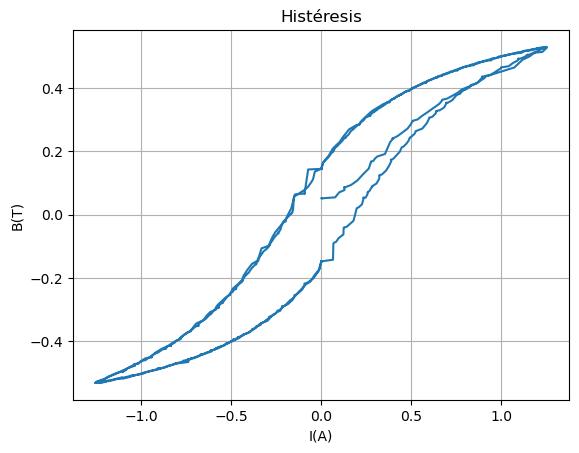

In [103]:
I = datos[:, 0]
B = datos[:, 1]

plt.plot(I, B)
plt.xlabel("I(A)")

plt.ylabel("B(T)")
plt.title("Histéresis")
plt.grid()

#plt.savefig("histeresis.pdf")
plt.show()


In [104]:
def M(B,H):
    mu0 = 4*np.pi*1e-7
    return B/mu0 - H


N = 600
L = 0.058
H = I*N/L    

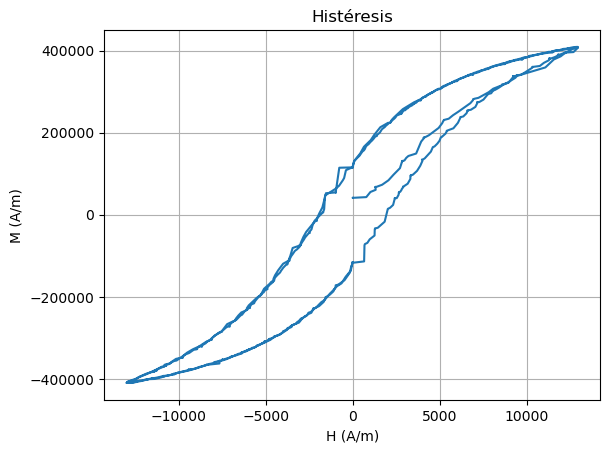

In [105]:
plt.plot(H, M(B,H))
plt.xlabel('H (A/m)')
plt.ylabel('M (A/m)')
plt.title("Histéresis")
plt.grid()
plt.show()

In [106]:
M_vec = M(B,H)
#print(M_vec)
lista_i = []
for i in range(len(M_vec)):
    if M_vec[i] > -15000 and M_vec[i] < 15000:
        lista_i.append(i)
        print(M_vec[i], "y el campo es ", H[i])

print(lista_i)

4290.772422240499 y el campo es  -1903.4482758620686
-5155.075887411152 y el campo es  -2006.896551724138
-9898.68969740939 y el campo es  -2037.9310344827586
-13050.754076488678 y el campo es  -2068.965517241379
-13856.873619534363 y el campo es  -2058.6206896551726
-14662.993162580047 y el campo es  -2048.2758620689656
-14631.958679821426 y el campo es  -2079.310344827586
3604.9057668370265 y el campo es  1965.5172413793102
13102.478214419712 y el campo es  2017.2413793103447
13898.25292987919 y el campo es  2017.2413793103447
14673.337990166254 y el campo es  2037.9310344827586
14673.337990166254 y el campo es  2037.9310344827586
13571.10349051284 y el campo es  -1634.4827586206895
9623.264395974078 y el campo es  -1665.5172413793105
7256.62990476806 y el campo es  -1686.206896551724
5665.080473849108 y el campo es  -1686.206896551724
5685.770129021522 y el campo es  -1706.896551724138
4931.3747239068725 y el campo es  -1748.2758620689656
4135.600008447396 y el campo es  -1748.27586

In [107]:
print(M_vec[237:239])
print(H[237:239]) 
#plt.scatter(H[lista_i], M_vec[lista_i])
k = (H[238]-H[237])/(M_vec[238]-M_vec[237])
print(H[237]+k*H[238]) #campo coercitivo

print(M_vec[652:654])
print(H[652:654]) 
#plt.scatter(H[lista_i], M_vec[lista_i])
k = (H[653]-H[652])/(M_vec[653]-M_vec[652])
print(H[652]+k*H[653]) #campo coercitivo



print(M_vec[1116:1118])
print(H[1116:1117]) 
#plt.scatter(H[lista_i], M_vec[lista_i])
k = (H[1117]-H[1116])/(M_vec[1117]-M_vec[1116]) 
print(H[1116]+k*H[1117]) #campo coercitivo






[ 4290.77242224 -5155.07588741]
[-1903.44827586 -2006.89655172]
-1925.427242843495
[ 3604.90576684 13102.47821442]
[1965.51724138 2017.24137931]
1976.5032140496419
[  4135.60000845 -14528.51040396]
[-1748.27586207]
-1799.0884090355712


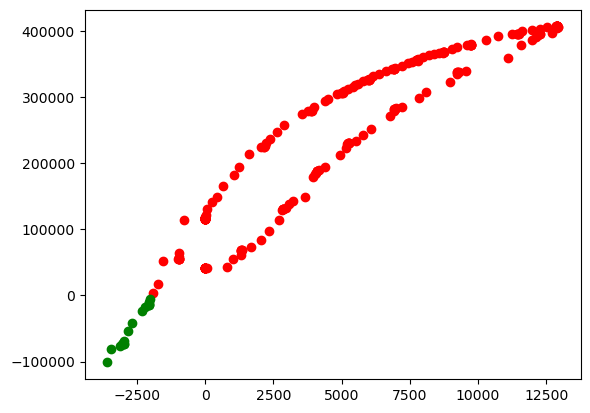

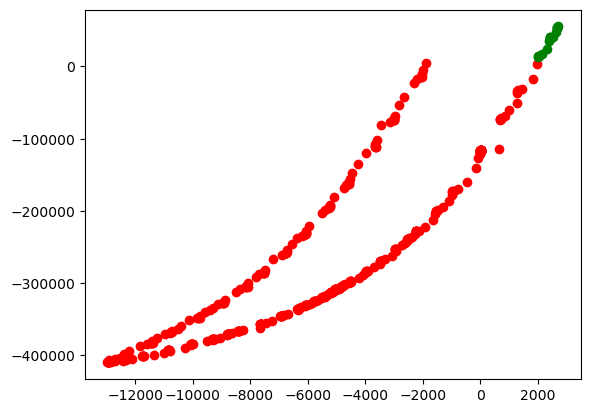

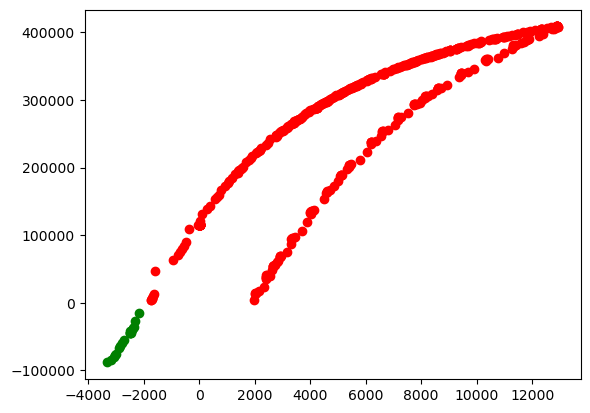

In [108]:
posiciones = [0, 237, 652 ,1116]
j_anterior = 0
for j in posiciones:
    if j == 0:
        continue
    #plt.plot(H[j-10:j+10], M_vec[j-10:j+10], color='blue')
    plt.scatter(H[j_anterior:j+1], M_vec[j_anterior:j+1], color='red')
    plt.scatter(H[j+1:j+20], M_vec[j+1:j+20], color='green')
    j_anterior = j
    plt.show()
    
    


In [109]:

print(M_vec[np.argmax(M_vec)])  #saturación positiva
print(np.argmax(M_vec))


print(M_vec[np.argmin(M_vec)])  #saturación negativa
print(np.argmin(M_vec))

print(M_vec[np.argmax(M_vec)]*4*np.pi*1e-7)  
print(M_vec[np.argmin(M_vec)]*4*np.pi*1e-7)  

408891.63367628126
803
-409708.09804691316
371
0.5138283809886935
-0.5148543803761716


In [110]:

lista_i = []
for i in range(len(M_vec)):
    if H[i] > -1 and H[i] < 1:
        lista_i.append(i)
        print(M_vec[i], "y el campo es ", H[i])
        print(M_vec[i]*4*np.pi*1e-7, "en T") 


print(lista_i)

41380.28520389279 y el campo es  0.0
0.052 en T
41380.28520389279 y el campo es  0.0
0.052 en T
41380.28520389279 y el campo es  0.0
0.052 en T
41380.28520389279 y el campo es  0.0
0.052 en T
116978.88317254306 y el campo es  0.0
0.14699999999999996 en T
116978.88317254306 y el campo es  0.0
0.14699999999999996 en T
116183.1084570836 y el campo es  0.0
0.146 en T
115387.33374162411 y el campo es  0.0
0.14499999999999996 en T
115387.33374162411 y el campo es  0.0
0.14499999999999996 en T
115387.33374162411 y el campo es  0.0
0.14499999999999996 en T
-116978.88317254306 y el campo es  0.0
-0.14699999999999996 en T
-116978.88317254306 y el campo es  0.0
-0.14699999999999996 en T
-116978.88317254306 y el campo es  0.0
-0.14699999999999996 en T
-116978.88317254306 y el campo es  0.0
-0.14699999999999996 en T
-116978.88317254306 y el campo es  0.0
-0.14699999999999996 en T
-116183.1084570836 y el campo es  0.0
-0.146 en T
-116183.1084570836 y el campo es  0.0
-0.146 en T
115387.33374162411 y

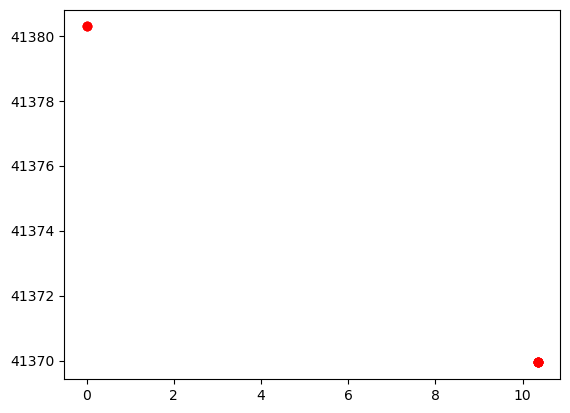

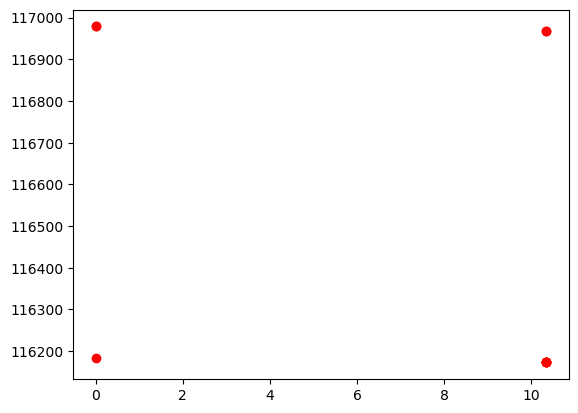

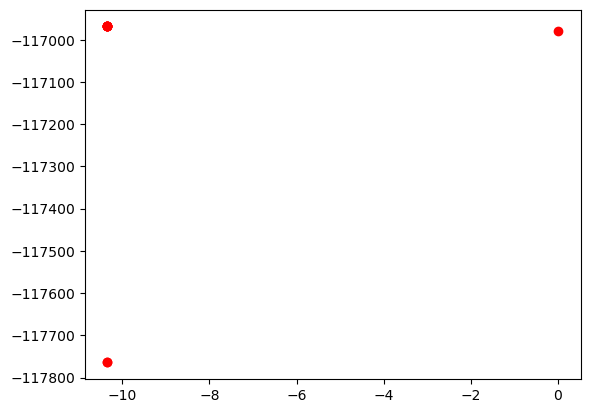

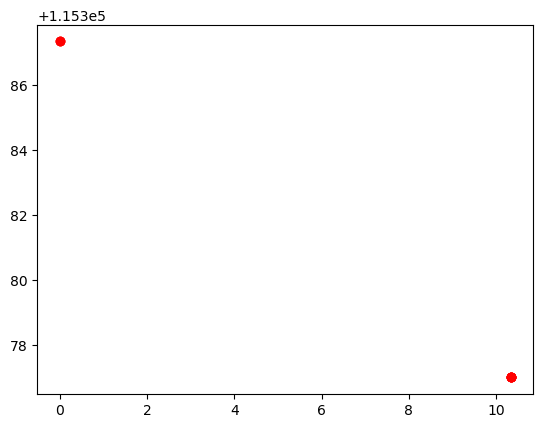

In [111]:
posiciones = [1, 200, 590 ,1073]
j_anterior = 1
for j in posiciones:
    if j == 0:
        continue
    #plt.plot(H[j-10:j+10], M_vec[j-10:j+10], color='blue')
    plt.scatter(H[j:j+10], M_vec[j:j+10], color='red')
    #plt.scatter(H[j+1:j+20], M_vec[j+1:j+20], color='green')
    j_anterior = j
    plt.show()
    
    



In [112]:
#M_primera_imanacion = M_vec[0:96]
#H_primera_imanacion = H[0:96]
H_filt = []
M_filt = []
contador = 0
last_m = -float('inf')
for h,m in zip(H, M_vec):
    if m > last_m:
        H_filt.append(h)
        M_filt.append(m)
        last_m = m

H_filt = np.array(H_filt)
print(len(H_filt))  
M_filt = np.array(M_filt)

61


In [113]:
def derivada_suave(H, M, ventana=20):
    n = len(H)
    chi = np.zeros(n)
    for i in range(n):
        i_min = max(0, i-ventana)
        i_max = min(n, i+ventana+1)
        coef = np.polyfit(H[i_min:i_max], M[i_min:i_max], deg = min(4, n-1))
        der = np.polyder(coef)
        chi[i] = np.polyval(der, H[i])
    return chi

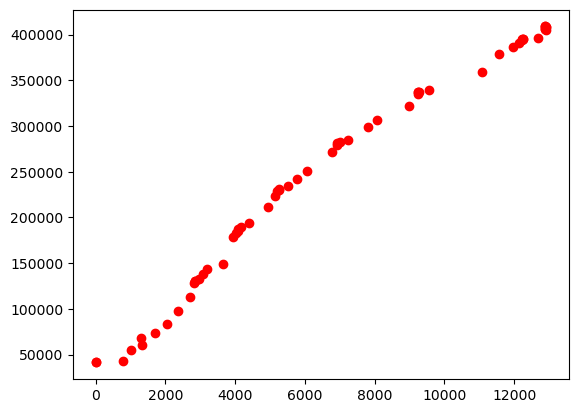

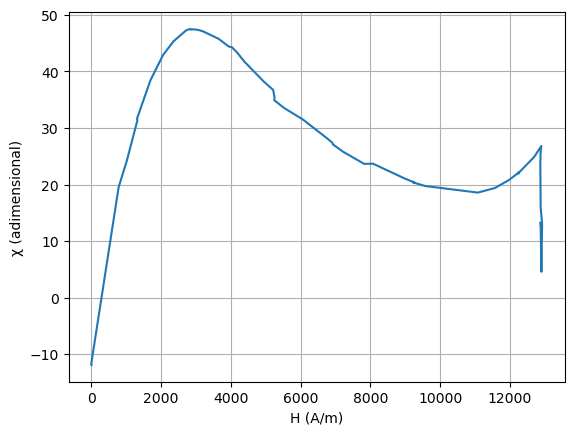

In [114]:

#H_primera_lin = np.linspace(H_filt[0], H_filt[-1], 1000)
#M_primera_lin = np.interp(H_primera_lin, H_filt, M_filt)
susceptibilidad = derivada_suave(H_filt, M_filt)
#susceptibilidad = derivada_suave(H_primera_lin, M_primera_lin)


plt.scatter(H_filt, M_filt, color='red', label='Punto de primera imanación')

plt.show()
plt.plot(H_filt , susceptibilidad)
plt.xlabel('H (A/m)')
plt.ylabel('χ (adimensional)')
plt.grid()
plt.savefig("susceptibilidad.pdf")
plt.show()

In [115]:
print(susceptibilidad)
print(max(susceptibilidad), "pico de susceptibilidad")
indice = np.argmax(susceptibilidad)
print(indice, "índice del pico" )
print(H_filt[indice], "campo en el pico de susceptibilidad")
print(M_filt[indice], "magnetización en el pico de susceptibilidad")

[-11.89301669 -11.75216394  19.53134678  24.28714157  31.36563275
  31.67616561  38.41860553  42.90936875  45.32591438  47.26620723
  47.5184843   47.43290285  47.43292026  47.430214    47.31234726
  47.08237049  45.76812643  44.41199728  44.26789841  44.01415714
  43.94034121  43.35605277  41.76014117  38.21523534  37.07570011
  36.74476793  35.40064961  34.92427187  33.54985162  32.61426184
  31.47659995  28.13898605  27.39082159  27.06779242  26.75605302
  25.75365321  23.66063103  23.67990684  21.10998582  20.45236782
  20.3199438   20.37156924  20.36852676  19.7432097   18.5781248
  19.38346803  20.75603325  21.51902973  21.92455251  22.14032316
  22.08138295  21.91812474  24.88460463  26.82446929  25.90735456
  23.76650926  15.88431533  13.09753292   4.57673773  12.45851995
  13.24472534]
47.51848430255359 pico de susceptibilidad
10 índice del pico
2834.4827586206898 campo en el pico de susceptibilidad
128468.34529219297 magnetización en el pico de susceptibilidad


In [116]:

H_post = H[106:]
B_post = B[106:]
H_post = np.array(H_post)
B_post = np.array(B_post)




In [117]:
E1 = 0
for i in range(237, 371):
    E1 += B_post[i]*(H_post[i+1]-H_post[i])  #A/m * A/m = J/m^3 
    
#E1 *= 4*np.pi*1e-7
print(E1, "energía por unidad de volumen en el primer tramo")


E2 = 0
for i in range(371, 652):
    E2 += B_post[i]*(H_post[i+1]-H_post[i])  #A/m * A/m = J/m^3 
#E2 *= 4*np.pi*1e-7
print(E2, "energía por unidad de volumen en el segundo tramo")

E = 2*(E2 - E1)  #J/m^3
print(E, "energía total por unidad de volumen")

V = 2*18*(3**2)*1e-6  #m^3
print(V, "volumen en m^3")
E_total = E*V  #J
print(E_total, "energía total en J")

P = 0.15
t = E_total / P  #s
print(t, "tiempo para disipar la energía a potencia P")


-2739.38275862069 energía por unidad de volumen en el primer tramo
-88.81034482758687 energía por unidad de volumen en el segundo tramo
5301.144827586206 energía total por unidad de volumen
0.00032399999999999996 volumen en m^3
1.7175709241379304 energía total en J
11.450472827586204 tiempo para disipar la energía a potencia P


In [118]:
datos2 = np.genfromtxt("ciclo5_p1.txt", skip_header=3, converters=conversores, delimiter="	")

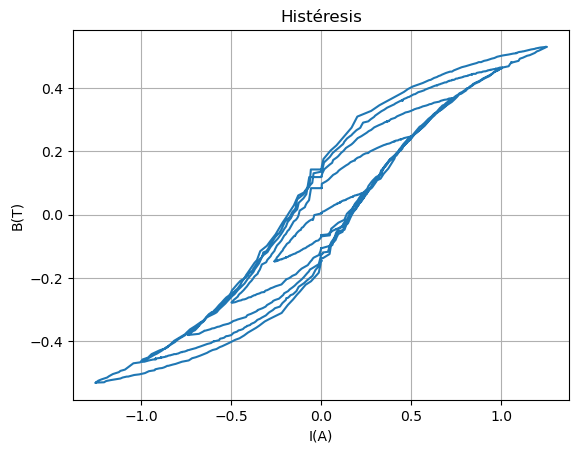

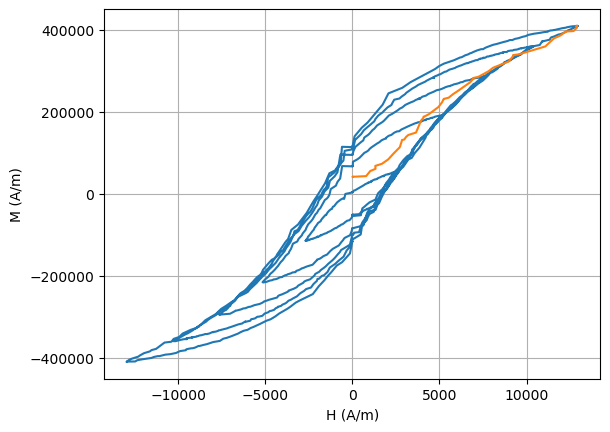

In [ ]:
I5 = datos2[:, 0]
B5 = datos2[:, 1]

plt.plot(I5, B5)
plt.xlabel("I(A)")

plt.ylabel("B(T)")
plt.title("Histéresis")
plt.grid()

#plt.savefig("histeresis.pdf")
plt.show()

H5 = I5*N/L  
M5 = M(B5,H5)
plt.plot(H5, M5)
plt.plot(H_filt , M_filt)
plt.xlabel('H (A/m)')
plt.ylabel('M (A/m)')
#plt.title("Histéresis")
plt.grid()
plt.savefig("cinco_ciclos.pdf")
plt.show()
